In [36]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

## Ethical considerations

https://www.eea.europa.eu/en/legal-notice

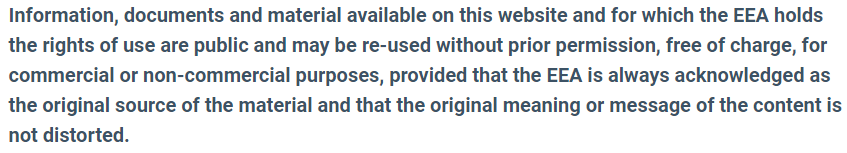

## Webscraping

### What is webscraping

In [2]:
html = urlopen('https://www.eea.europa.eu/en/newsroom/news/europe-is-not-prepared-for')
bs = BeautifulSoup(html, "html.parser")
container = bs.findAll('p')
for name in container:
    print(name.get_text())

All official European Union website addresses are in the europa.eu domain.
Press releasePublished 11 Mar 2024
Europe is the fastest warming continent in the world, and climate risks are threatening its energy and food security, ecosystems, infrastructure, water resources, financial stability, and people’s health. According to the European Environment Agency’s (EEA) assessment, published today, many of these risks have already reached critical levels and could become catastrophic without urgent and decisive action. 

Extreme heat, drought, wildfires, and flooding, as experienced in recent years, will worsen in Europe even under optimistic global warming scenarios and affect living conditions throughout the continent. The EEA has published the first ever European Climate Risk Assessment (EUCRA) to help identify policy priorities for climate change adaptation and for climate-sensitive sectors.
According to the assessment, Europe’s policies and adaptation actions are not keeping pace with 

## Filtering

In [3]:
# defining keywords of interest
keywords = ["climate change", "natural disasters", "heat", "unnatural"]

# looping through each paragraph and printing only those containing the keywords
for paragraph in container:
    text = paragraph.get_text().lower()  
    if any(keyword in text for keyword in keywords):
        print(paragraph.get_text())

Extreme heat, drought, wildfires, and flooding, as experienced in recent years, will worsen in Europe even under optimistic global warming scenarios and affect living conditions throughout the continent. The EEA has published the first ever European Climate Risk Assessment (EUCRA) to help identify policy priorities for climate change adaptation and for climate-sensitive sectors.
Some regions in Europe are hotspots for multiple climate risks. Southern Europe is particularly at risk from wildfires and impacts of heat and water scarcity on agricultural production, outdoor work, and human health. Flooding, erosion and saltwater intrusion threaten Europe’s low-lying coastal regions, including many densely populated cities. 
The assessment identifies 36 major climate risks for Europe within five broad clusters: ecosystems, food, health, infrastructure, and economy and finance. More than half of the major climate risks identified in the report demand more action now and eight of them are part

## Visualisation

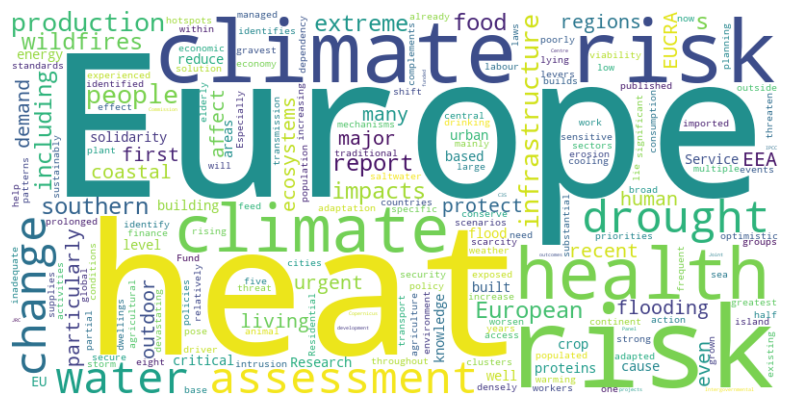

In [4]:
relevant_text = ""
for paragraph in container:
    text = paragraph.get_text().lower()
    if any(keyword in text for keyword in keywords):
        relevant_text += " " + paragraph.get_text()
        

if relevant_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(relevant_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No relevant paragraphs found containing the specified keywords.")

## Sentiment Analysis 

In [31]:
# html = urlopen('https://www.eea.europa.eu/en/newsroom/news/europe-is-not-prepared-for')
# bs = BeautifulSoup(html, "html.parser")

# extracts all elements signed as p for paragraph
container = bs.findAll('p')

#sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
results = []

# determination of the emotion based on VADER sentiment scores
def get_emotion(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# apply sentiment analysis - includes polarity and subjectivity and emotions
for name in container:
    text = name.get_text()
    sentiment = TextBlob(text).sentiment
    vader_sentiment = analyzer.polarity_scores(text)
    emotion = get_emotion(vader_sentiment)
    subjectivity = 'Y' if sentiment.subjectivity > 0.5 else 'N'
    results.append({
        'Text': text,
        'Polarity': sentiment.polarity,
        'Subjectivity': sentiment.subjectivity,
        'Is Subjective': subjectivity,
        'Emotion': emotion
    })

sentiment_analysis = pd.DataFrame(results)

In [32]:
sentiment_analysis

,Text,Polarity,Subjectivity,Is Subjective,Emotion
0,All official European Union website addresses ...,0.000000,0.000000,N,Neutral
1,Press releasePublished 11 Mar 2024,0.000000,0.000000,N,Neutral
2,Europe is the fastest warming continent in the...,0.120000,0.280000,N,Negative
3,,0.000000,0.000000,N,Neutral
4,"Extreme heat, drought, wildfires, and flooding...",0.154167,0.413889,N,Positive
5,"According to the assessment, Europe’s policies...",0.210000,0.460000,N,Positive
6,Some regions in Europe are hotspots for multip...,0.133333,0.186667,N,Negative
7,Our new analysis shows that Europe faces urgen...,0.189899,0.395960,N,Positive
8,The assessment identifies 36 major climate ris...,0.154514,0.362153,N,Positive
9,Ecosystems: Almost all risks in the ecosystem ...,0.114524,0.406905,N,Negative


C:\Users\nicol\AppData\Local\Temp\ipykernel_65948\3815877820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_analysis, x='Emotion', palette='viridis')


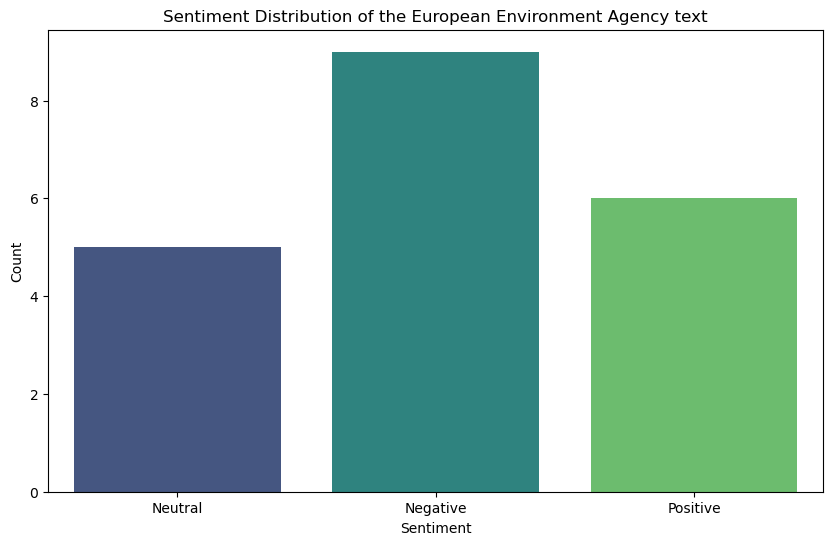

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sentiment_analysis, x='Emotion', palette='viridis')
plt.title('Sentiment Distribution of the European Environment Agency text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()